## Title:HealthCareAnalytics

In [21]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 6,6
sns.set_style('whitegrid')

## Business Case :The goal of this project is to accurately predict the Length of Stay for each patient so that the hospitals can optimize resources and function better.
### Multiclass Classification

In [23]:
## read the dataset
data=pd.read_csv('HealthCareAnalytics.csv')
data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,Nov-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,Nov-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,Nov-20,3761,Nov-20


## Basic Checks

In [24]:
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [25]:
data.tail()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,Nov-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,Nov-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,Nov-20,3761,Nov-20
318437,318438,19,a,7,Y,5,gynecology,Q,C,2.0,21641,8.0,Emergency,Minor,2,Nov-20,4752,0-10


In [26]:
data.describe()

,case_id,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Visitors_with_Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [27]:
data.nunique()

case_id                              318438
Hospital_code                            32
Hospital_type_code                        7
City_Code_Hospital                       11
Hospital_region_code                      3
Available_Extra_Rooms_in_Hospital        18
Department                                5
Ward_Type                                 6
Ward_Facility_Code                        6
Bed_Grade                                 4
patientid                             92017
City_Code_Patient                        37
Type_of_Admission                         3
Severity_of_Illness                       3
Visitors_with_Patient                    28
Age                                      10
Admission_Deposit                      7300
Stay                                     11
dtype: int64

In [28]:
data.describe(include='O')

,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type_of_Admission,Severity_of_Illness,Age,Stay
count,318438,318438,318438,318438,318438,318438,318438,318438,318438
unique,7,3,5,6,6,3,3,10,11
top,a,X,gynecology,R,F,Trauma,Moderate,41-50,21-30
freq,143425,133336,249486,127947,112753,152261,175843,63749,87491


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed_Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [30]:
data.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available_Extra_Rooms_in_Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed_Grade',
       'patientid', 'City_Code_Patient', 'Type_of_Admission',
       'Severity_of_Illness', 'Visitors_with_Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [31]:
sorted(data.City_Code_Patient.unique())

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 13.0,
 14.0,
 nan,
 11.0,
 12.0,
 15.0,
 16.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0]

In [32]:
data.Severity_of_Illness.value_counts()

Moderate    175843
Minor        85872
Extreme      56723
Name: Severity_of_Illness, dtype: int64

## Basic Understanding of Features --> Domain Analysis

###### 17 attributes
                           
case_id:case sequence .It will be dropped.

Hospital_code:Hospital was represented by code(1-32). It helps can be administered in the quickest way possible

Hospital_type_code :Hospital had been categorized into 'a', 'b', 'c', 'd', 'e', 'f', 'g'

City_Code_Hospital :City in the data was represented by number(1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 13)

Hospital_region_code :Regions were represented by 'Z', 'X', 'Y'       

Available_Extra_Rooms_in_Hospital:The extra rooms that available in the hospitals,would affect the doctors' decision about the length of patients period stay at hospital [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 20, 21, 24]

Department  :Patients'disease , status and financial status  decide the types of before,after special treatment they should received.For example TB can affect any organ system, although manifestations are most commonly related to the chest. Besides ,it is infective if the patient do not recover and walk in public ,this will cause a big problem .

radiotherapy:Treatment for cancer involving radioactive energy to                         destroy the cancer cells and their division.

anesthesia:Anesthesia is a state of controlled, temporary loss of sensation            or awareness that is induced for medical purposes. It may                  include some or all of analgesia (relief from or prevention of               pain), paralysis (muscle relaxation), amnesia (loss of memory),             and unconsciousness

gynecology :the branch of physiology and medicine which deals with the                functions and diseases specific to women and girls, especially              those affecting the reproductive system.

TB & Chest disease:manage the patients of TB, Asthma, lung cancer and other                   allied chest diseases diagnosis treatment in the field of                    tuberculosis, asthma, allergy, and allied sciences.

surgery :Different part of body,need special after surgery treatment,which         cannot be handled by patients'family .Surgery could be divided into         Urgent Surgery,Elective Surgery,Required Surgery,Selective                 Surgery,Optional Surgery.Practitioners would provide treatment plan         to patients according to patients'disease and status,then the             patients make the decision .              
Ward_Type: Wards have been divided into these types['P', 'Q', 'R', 'S', 'T', 'U'] to convenient healthcare professional takes care patients.

Ward_Facility_Code: ['A', 'B', 'C', 'D', 'E', 'F'] These codes would help hospital manages their facility.   

Bed_Grade:1.0, 2.0, 3.0, 4.0, nan   

patientid:  The hospital patient ID wristband contains a barcode, which can easily be scanned using a barcode scanner. The band provides important health care information such as: patient’s name, previous conditions, allergies, what type of medicine should be administered and medicine dosage.

City_Code_Patient:Patients from different city to get better treatment from the hospitals(1-38,except 17 and have nan values)

Type_of_Admission:According to patients' status, professional categorized them as 'Emergency', 'Trauma', 'Urgent'

Severity_of_Illness :According to patients' status, professional categorized them as 'Extreme', 'Minor', 'Moderate' 

Visitors_with_Patient:Disease and status patients suffer from ,would decide they could be visited or not. 

Age   :This data have been divided into 10 groups : '51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30','Nov-20', '0-10', '91-100'            

Admission_Deposit  : A non-refundable deposit is required of new students in order to reserve a place in the entering class

Stay  :The number of days patients stay at the hospital.Target variable                             

## Exploratory Data Analysis:-
### univariate Analysis

In [33]:
##!pip install sweetviz

import sweetviz as sv
my_report = sv.analyze(data)## pass the original dataframe
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Bivariate or Multivariate Analysis

In [36]:
data.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available_Extra_Rooms_in_Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed_Grade',
       'patientid', 'City_Code_Patient', 'Type_of_Admission',
       'Severity_of_Illness', 'Visitors_with_Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [37]:
data1=data[['Hospital_code', 'City_Code_Hospital','Available_Extra_Rooms_in_Hospital','Bed_Grade','City_Code_Patient', 'Visitors_with_Patient'
, 'Admission_Deposit']]
data1

,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,City_Code_Patient,Visitors_with_Patient,Admission_Deposit
0,8,3,3,2.0,7.0,2,4911
1,2,5,2,2.0,7.0,2,5954
2,10,1,2,2.0,7.0,2,4745
3,26,2,2,2.0,7.0,2,7272
4,26,2,2,2.0,7.0,2,5558
...,...,...,...,...,...,...,...
318433,6,6,3,4.0,23.0,3,4144
318434,24,1,2,4.0,8.0,4,6699
318435,7,4,3,4.0,10.0,3,4235
318436,11,2,3,3.0,8.0,5,3761


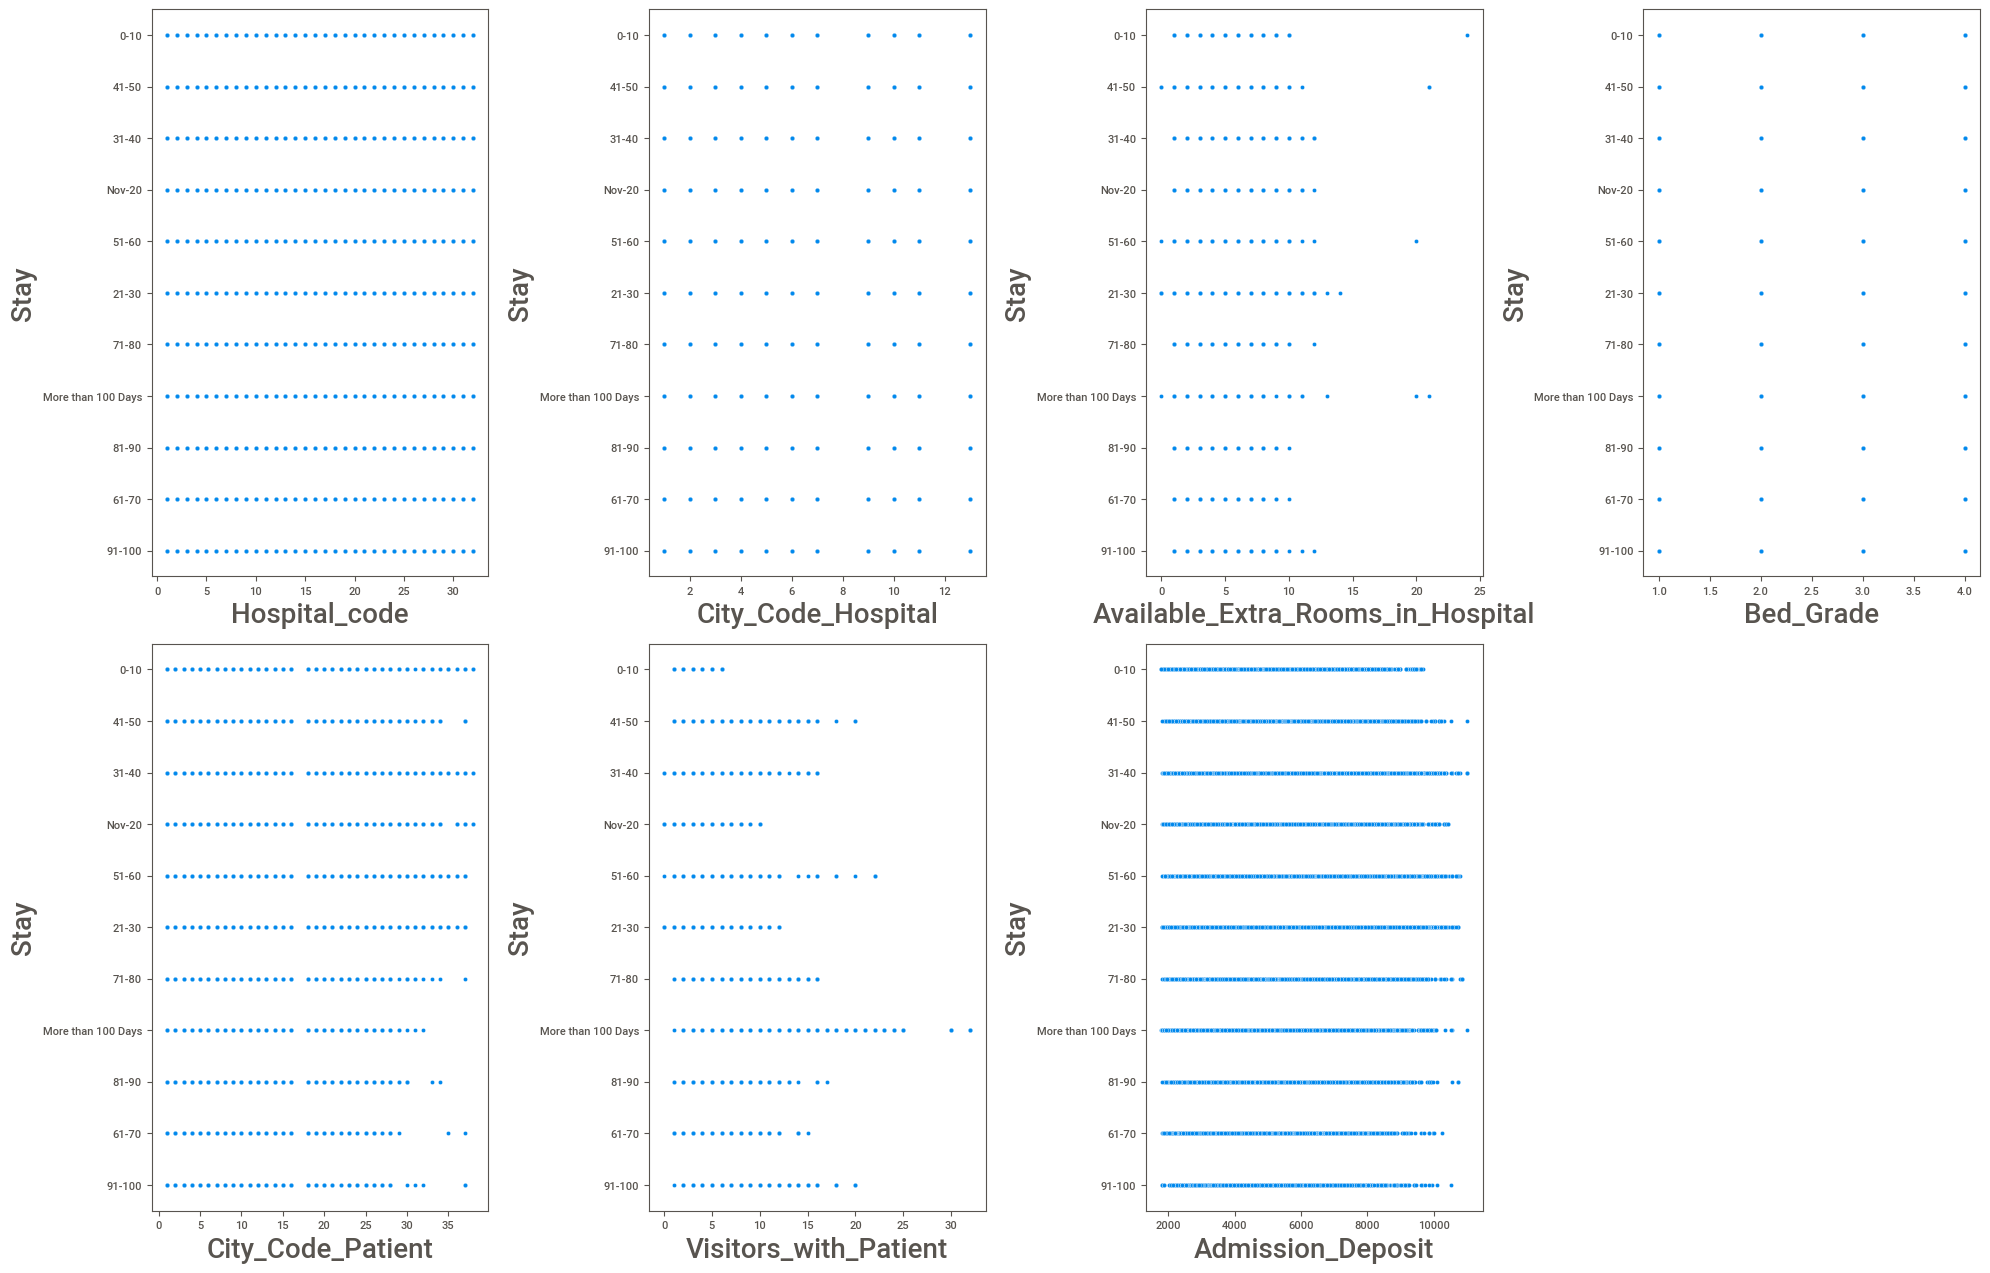

In [38]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=10 :   ## as there is 10 columns
        ax = plt.subplot(4,4,plotnumber)
        sns.scatterplot(x=data1[column].dropna(axis=0)
                        ,y=data.Stay)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Stay',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Great, the relationship between the dependent and independent variables look fairly linear. Thus, our linearity assumption is satisfied.

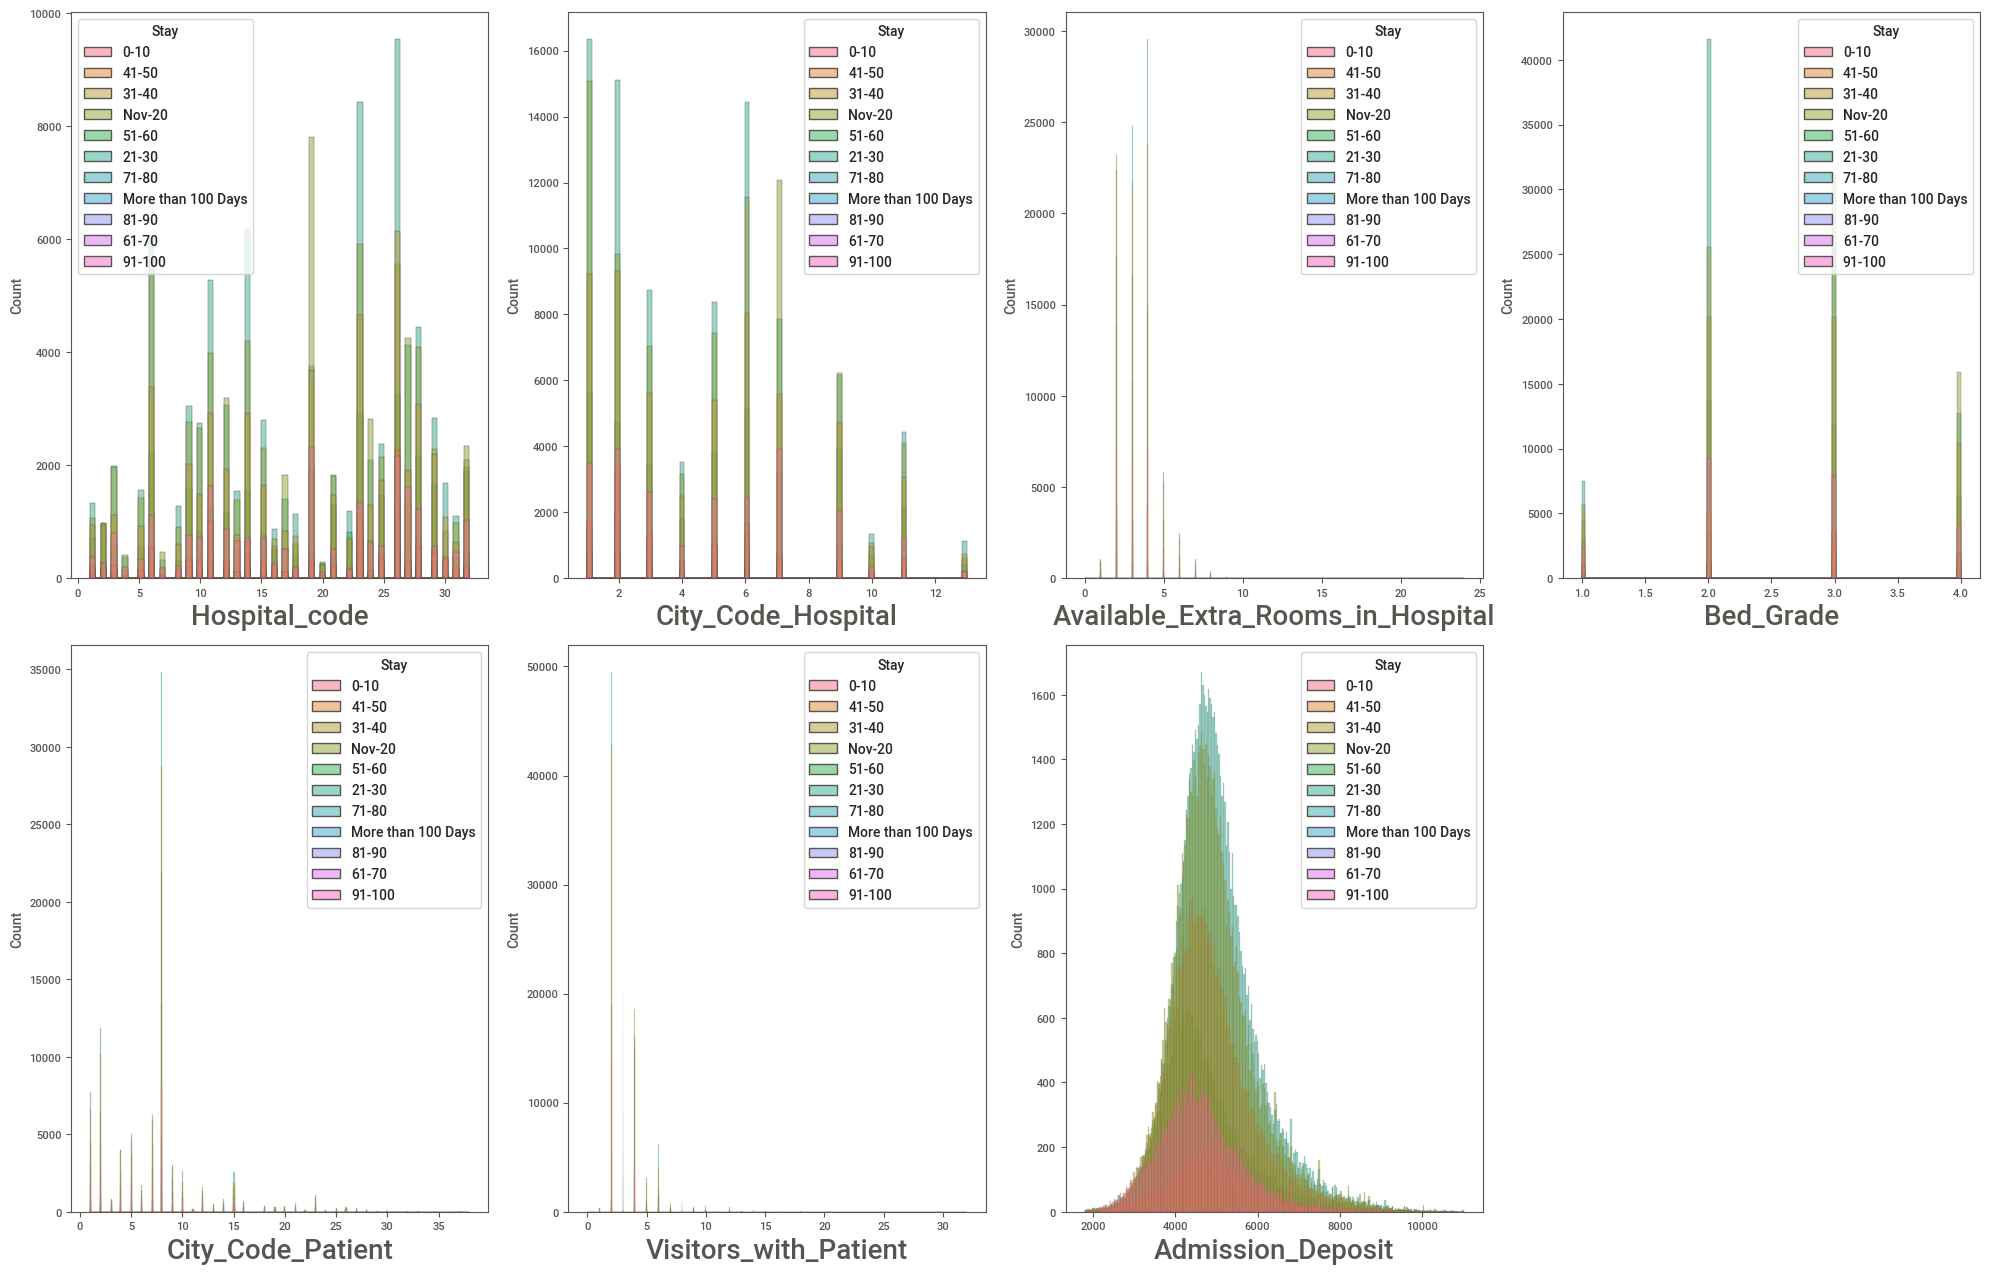

In [39]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=10 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=data1[column],hue=data.Stay)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

C:\Users\Emmal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Emmal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Emmal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

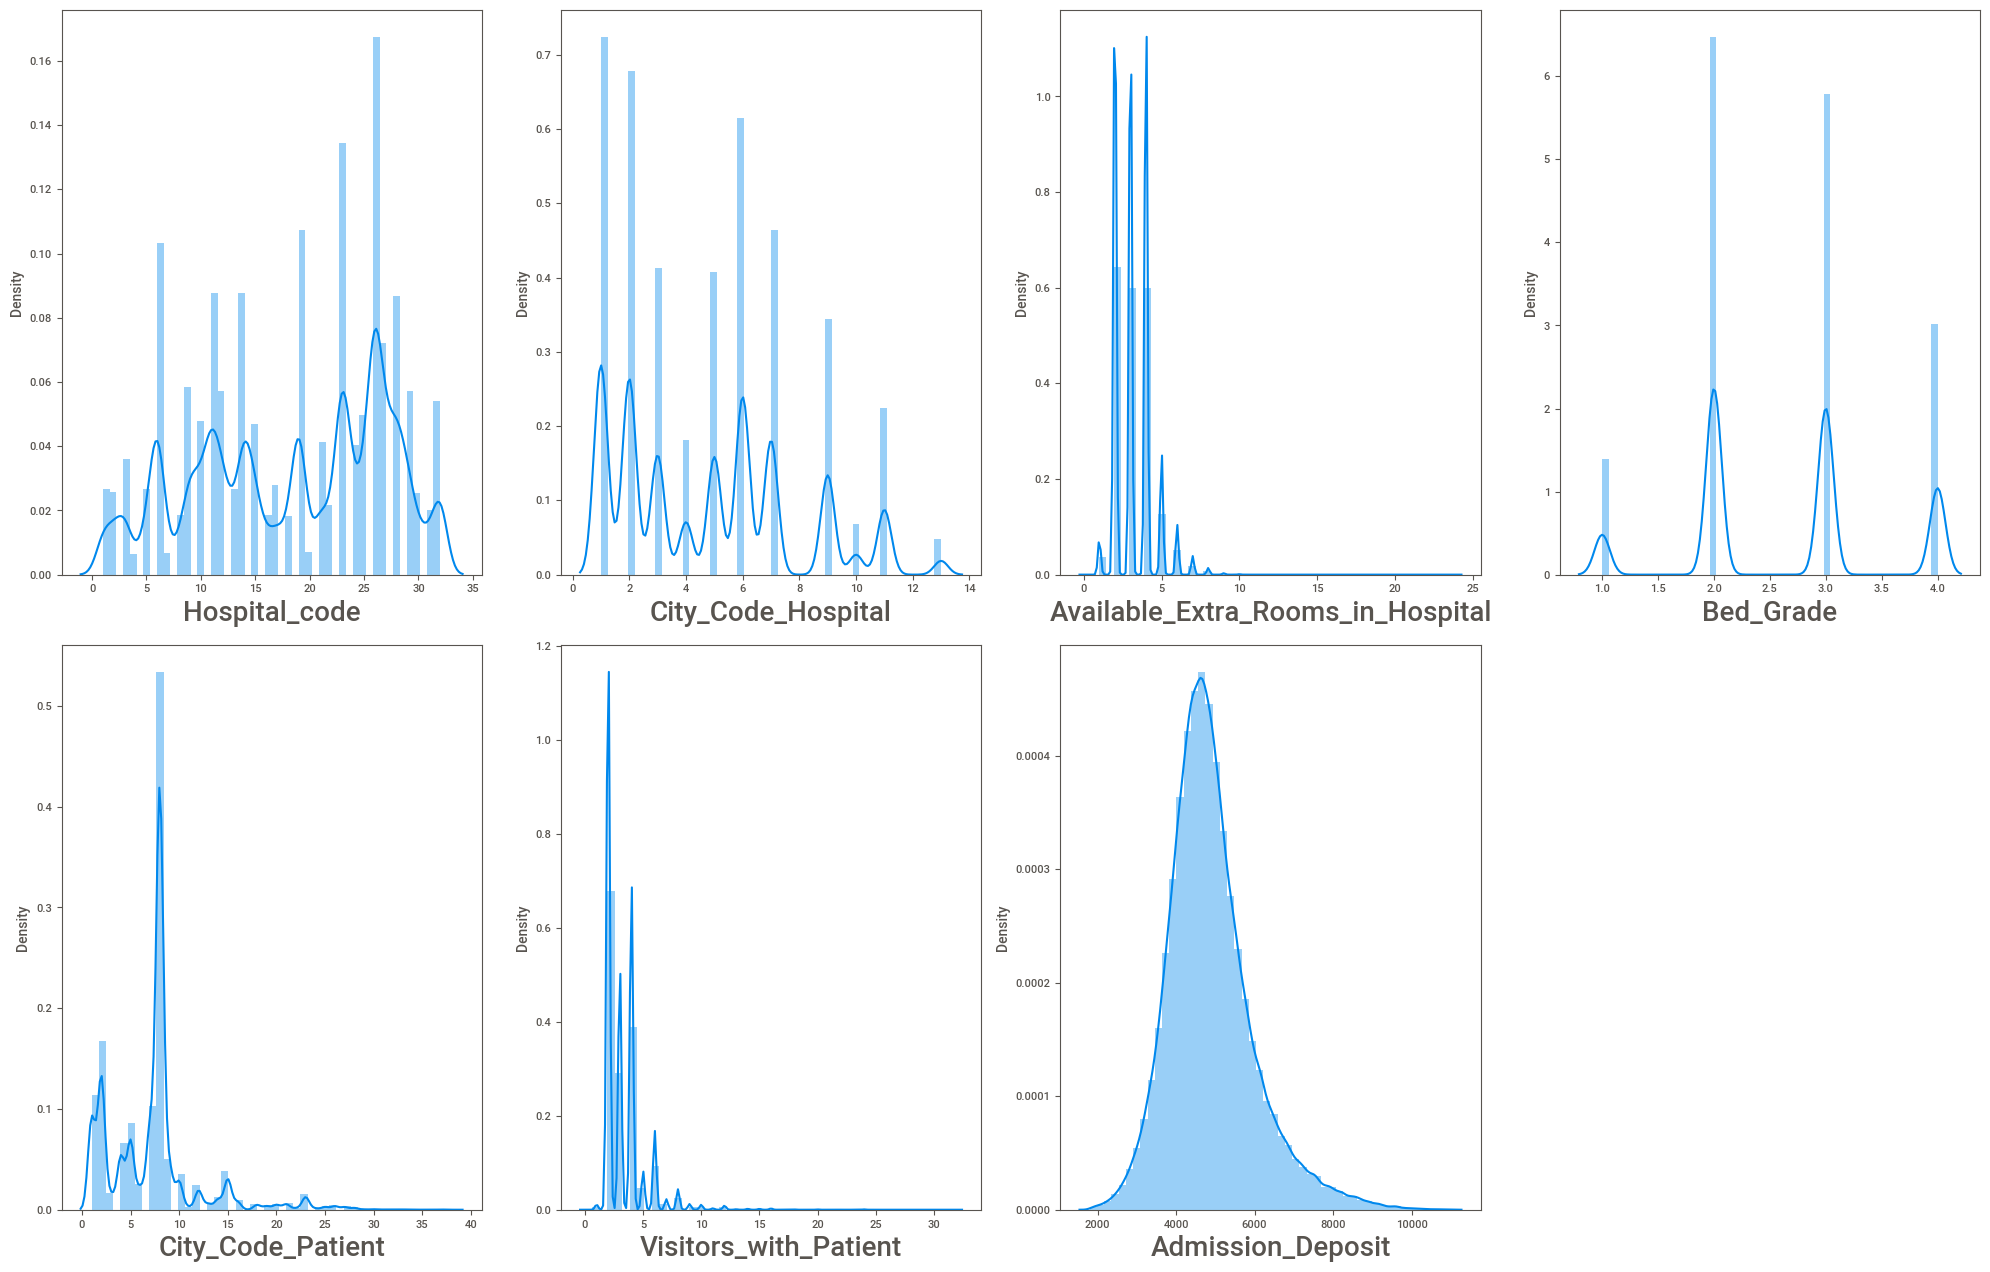

In [41]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=10 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(x=data1[column].dropna(axis=0))
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

Most people visit hospital 26 .Hospital in City 1 people most frequent to go.Normally, hospital will preserve 2 Extra_Rooms_in_Hospital.Grade 2 bed is the highest utility.Patients from city 8 has the highest amount.Most patients have been visited by 2 relatives.138417 would be the most frequent amount of admission deposit. 

## Categorical Feature Distributions

C:\Users\Emmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Severity_of_Illness', ylabel='count'>

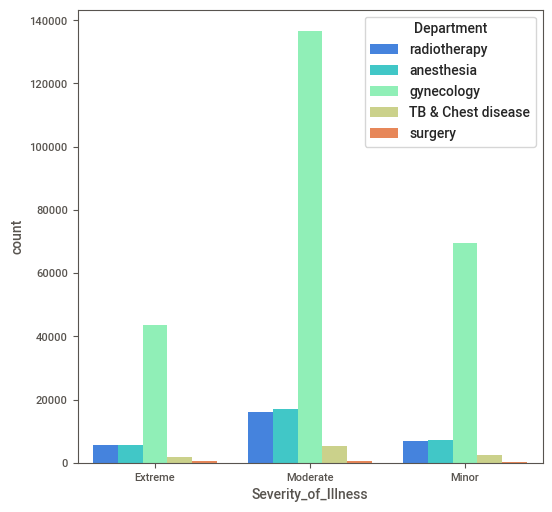

In [42]:
sns.countplot(data['Severity_of_Illness'],hue=data['Department'],palette='rainbow')

C:\Users\Emmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type_of_Admission', ylabel='count'>

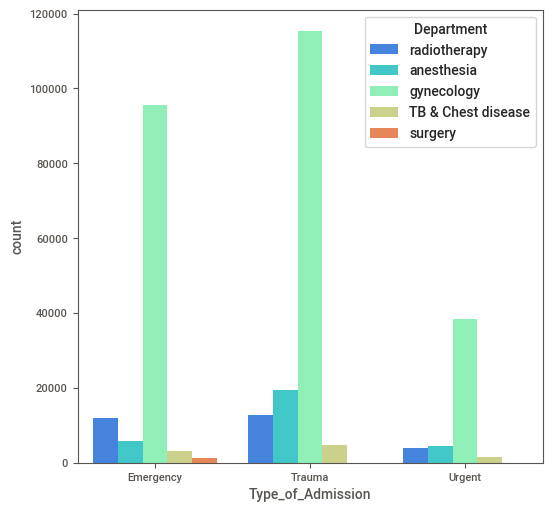

In [43]:
sns.countplot(data['Type_of_Admission'],hue=data['Department'],palette='rainbow')

C:\Users\Emmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ward_Type', ylabel='count'>

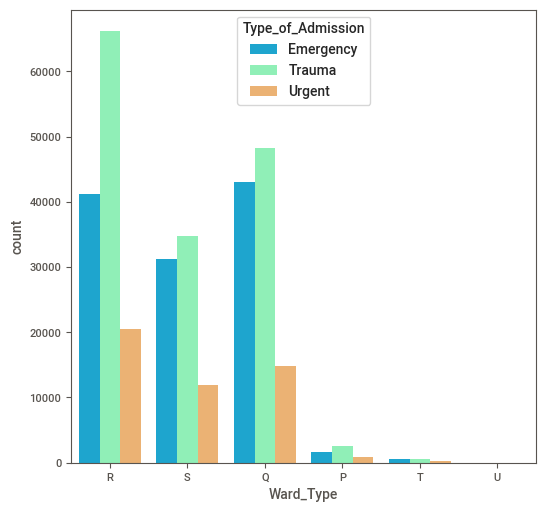

In [44]:
sns.countplot(data['Ward_Type'],hue=data['Type_of_Admission'],palette='rainbow')

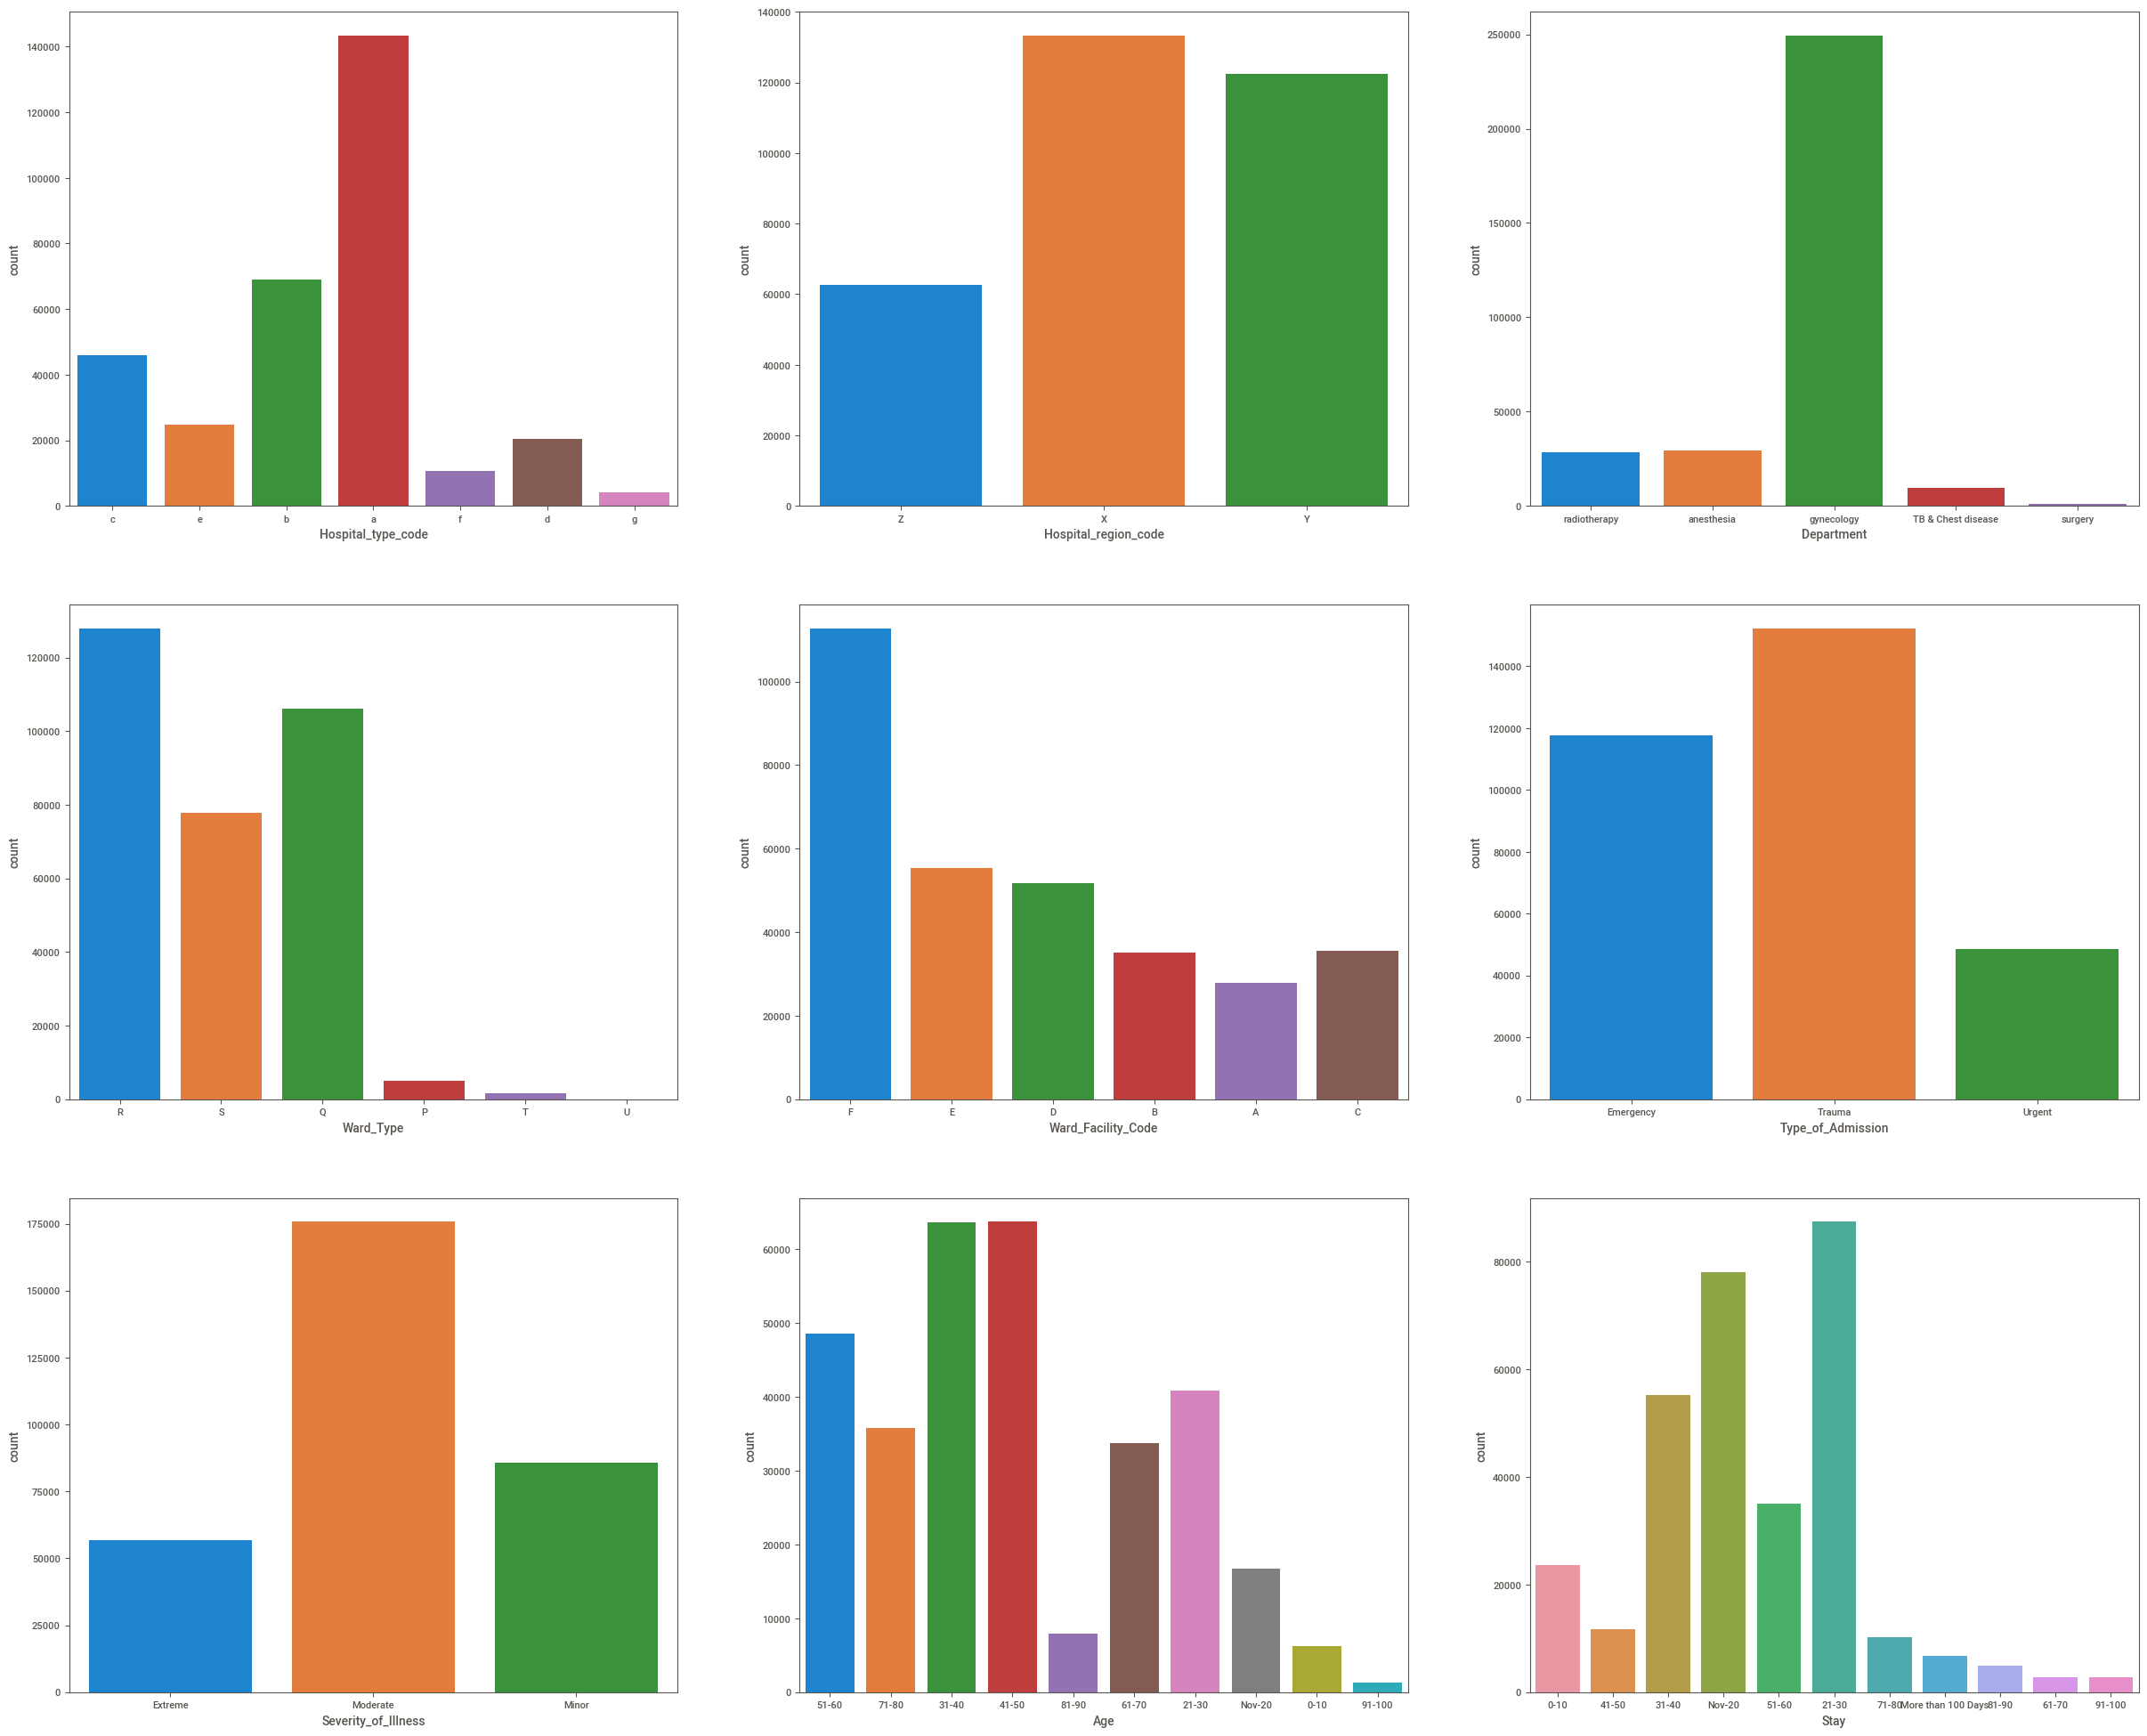

In [45]:
categorical = ['Hospital_type_code', 'Hospital_region_code','Department'
               , 'Ward_Type', 'Ward_Facility_Code', 'Type_of_Admission'
               ,'Severity_of_Illness','Age', 'Stay']
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(30, 25))
for col, ax in zip(categorical[0:], axs.ravel()):
    sns.countplot(x=col, data=data, ax=ax)

Type a hospital has more patients,whereas hospital in region X has more patients than Region Y and Z.Gynecology is the department more patient visited.When patients have to stay at hospital, most patients used R wards.The utility of F ward facility is the most frequent one.
More patients were admitted as trauma.Over half of these cases were diagnosis as moderate.The total of patients who aged 31-50 is higher than other age group.Most patients  will stay within 30days

## Data Preprocessing

In [46]:
data.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed_Grade                             113
patientid                               0
City_Code_Patient                    4532
Type_of_Admission                       0
Severity_of_Illness                     0
Visitors_with_Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [47]:
data.Bed_Grade.value_counts()

2.0    123671
3.0    110583
4.0     57566
1.0     26505
Name: Bed_Grade, dtype: int64

In [48]:
data.City_Code_Patient.value_counts()

8.0     124011
2.0      38869
1.0      26377
7.0      23807
5.0      20079
4.0      15380
9.0      11795
15.0      8950
10.0      8174
6.0       6005
12.0      5647
3.0       3772
23.0      3698
14.0      2927
16.0      2254
13.0      1625
21.0      1602
20.0      1409
18.0      1404
19.0      1028
26.0      1023
25.0       798
27.0       771
11.0       658
28.0       521
22.0       405
24.0       360
30.0       133
29.0        98
33.0        78
31.0        59
37.0        57
32.0        52
34.0        46
35.0        16
36.0        12
38.0         6
Name: City_Code_Patient, dtype: int64

In [49]:
data.Age.value_counts()

41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
Nov-20    16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64

In [50]:
data.loc[data['Bed_Grade'].isnull()==True]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
293,294,6,a,6,X,4,gynecology,Q,F,NaN,27075,15.0,Trauma,Extreme,2,21-30,4420,31-40
1071,1072,6,a,6,X,2,gynecology,Q,F,NaN,62491,8.0,Trauma,Extreme,4,61-70,5395,21-30
20379,20380,6,a,6,X,4,gynecology,Q,F,NaN,69932,2.0,Trauma,Extreme,3,41-50,5989,31-40
23791,23792,6,a,6,X,3,gynecology,R,F,NaN,29943,10.0,Emergency,Minor,3,31-40,4488,41-50
25162,25163,6,a,6,X,5,gynecology,R,F,NaN,92499,1.0,Emergency,Minor,2,71-80,4885,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234337,234338,6,a,6,X,2,radiotherapy,R,F,NaN,22881,7.0,Emergency,Minor,2,Nov-20,2416,0-10
234577,234578,6,a,6,X,2,gynecology,R,F,NaN,120677,2.0,Trauma,Extreme,4,41-50,4932,51-60
234895,234896,6,a,6,X,2,gynecology,R,F,NaN,111514,1.0,Trauma,Moderate,4,51-60,3984,Nov-20
235048,235049,6,a,6,X,2,gynecology,R,F,NaN,57706,2.0,Trauma,Moderate,3,41-50,4139,51-60


In [51]:
## Getting the rows where values got missed
data.loc[data['City_Code_Patient'].isnull()==True]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
191,192,14,a,1,X,2,radiotherapy,Q,E,3.0,122110,NaN,Emergency,Minor,2,71-80,9096,51-60
192,193,30,c,3,Z,2,anesthesia,Q,A,4.0,122110,NaN,Trauma,Minor,2,71-80,5098,31-40
193,194,27,a,7,Y,2,radiotherapy,P,C,3.0,122110,NaN,Trauma,Minor,2,71-80,7776,21-30
194,195,27,a,7,Y,2,anesthesia,Q,C,3.0,122110,NaN,Trauma,Minor,2,71-80,5988,Nov-20
195,196,25,e,1,X,3,radiotherapy,S,E,3.0,122110,NaN,Urgent,Minor,2,71-80,5333,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318198,318199,23,a,6,X,2,anesthesia,Q,F,3.0,58469,NaN,Urgent,Minor,2,Nov-20,4432,Nov-20
318263,318264,28,b,11,X,3,anesthesia,R,F,3.0,66803,NaN,Trauma,Moderate,2,31-40,5415,Nov-20
318269,318270,26,b,2,Y,3,gynecology,R,D,4.0,95483,NaN,Trauma,Minor,5,51-60,4135,51-60
318271,318272,28,b,11,X,2,gynecology,R,F,4.0,117128,NaN,Emergency,Minor,2,61-70,3418,0-10


In [52]:
## Impuation using inbuild method fillna.
data['Bed_Grade'] = data['Bed_Grade'].fillna(data['Bed_Grade'].mode()[0])

data['City_Code_Patient'] = data['City_Code_Patient'].fillna(data['City_Code_Patient'].mode()[0])


In [53]:
data.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available_Extra_Rooms_in_Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed_Grade                            0
patientid                            0
City_Code_Patient                    0
Type_of_Admission                    0
Severity_of_Illness                  0
Visitors_with_Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [54]:
## There are categorical data need to convert them into numerical

In [55]:
data.Hospital_type_code.value_counts()

a    143425
b     68946
c     45928
e     24770
d     20389
f     10703
g      4277
Name: Hospital_type_code, dtype: int64

In [56]:
data.Hospital_type_code=data.Hospital_type_code.map({'a':0,'b':2,'c':3,'d':4,'e':5,'f':6,'g':7})

In [57]:
data.Hospital_region_code.value_counts()

X    133336
Y    122428
Z     62674
Name: Hospital_region_code, dtype: int64

In [58]:
data.Hospital_region_code=data.Hospital_region_code.map({'X':0,'Y':1,'Z':2})

In [59]:
data.Department.value_counts(())

gynecology            249486
anesthesia             29649
radiotherapy           28516
TB & Chest disease      9586
surgery                 1201
Name: Department, dtype: int64

In [60]:
data.Department=data.Department.map({'gynecology':0,'anesthesia':1,'radiotherapy':2,'TB & Chest disease':3,
                                   'surgery':4})

In [61]:
data.Ward_Type.value_counts()

R    127947
Q    106165
S     77794
P      5046
T      1477
U         9
Name: Ward_Type, dtype: int64

In [62]:
data.Ward_Type=data.Ward_Type.map({'R':0,'Q':1,'S':2,'P':3,'T':4,'U':5})

In [63]:
data.Ward_Facility_Code.value_counts()

F    112753
E     55351
D     51809
C     35463
B     35156
A     27906
Name: Ward_Facility_Code, dtype: int64

In [64]:
data.Ward_Facility_Code=data.Ward_Facility_Code.map({'F':0,'E':1,'D':2,'C':3,'B':4,'A':5})

In [65]:
data.Type_of_Admission.value_counts()

Trauma       152261
Emergency    117676
Urgent        48501
Name: Type_of_Admission, dtype: int64

In [66]:
data.Type_of_Admission=data.Type_of_Admission.map({'Trauma':0,'Emergency':1,'Urgent':2})

In [67]:
data.Severity_of_Illness.value_counts()

Moderate    175843
Minor        85872
Extreme      56723
Name: Severity_of_Illness, dtype: int64

In [68]:
data.Severity_of_Illness=data.Severity_of_Illness.map({'Moderate':0,'Minor':1,'Extreme':2})

In [71]:
data.Age.value_counts()

41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
Nov-20    16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64

In [72]:
#data.Age=data.Age.map({"'0-10','Nov-20','21-30','31-40','41-50'":0,"'51-60','61-70','71-80','81-90','91-100'":1})
data.Age=data.Age.map({'0-10':0,'Nov-20':1,'21-30':2,'31-40':3,'41-50':4,'51-60':5,'61-70':6,'71-80':7,'81-90':8,'91-100':9})

In [73]:
data.Stay.value_counts()

21-30                 87491
Nov-20                78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [74]:
data.loc[data['Stay']=='21-30','Stay']='Group1'
data.loc[data['Stay']=='Nov-20','Stay']='Group1'
data.loc[data['Stay']=='31-40','Stay']='Group1'
data.loc[data['Stay']=='51-60','Stay']='Group2'
data.loc[data['Stay']=='0-10','Stay']='Group2'
data.loc[data['Stay']=='41-50','Stay']='Group2'
data.loc[data['Stay']=='71-80','Stay']='Group3'
data.loc[data['Stay']=='More than 100 Days','Stay']='Group3'
data.loc[data['Stay']=='81-90','Stay']='Group3'
data.loc[data['Stay']=='91-100','Stay']='Group4'
data.loc[data['Stay']=='61-70','Stay']='Group4'


In [75]:
data.Stay=data.Stay.map({'Group1':1,'Group2':2,'Group3':3,'Group4':4})

In [76]:
data.groupby(data['Stay']).agg({'Age':'count'})

,Age
Stay,
1,220789
2,70365
3,21775
4,5509


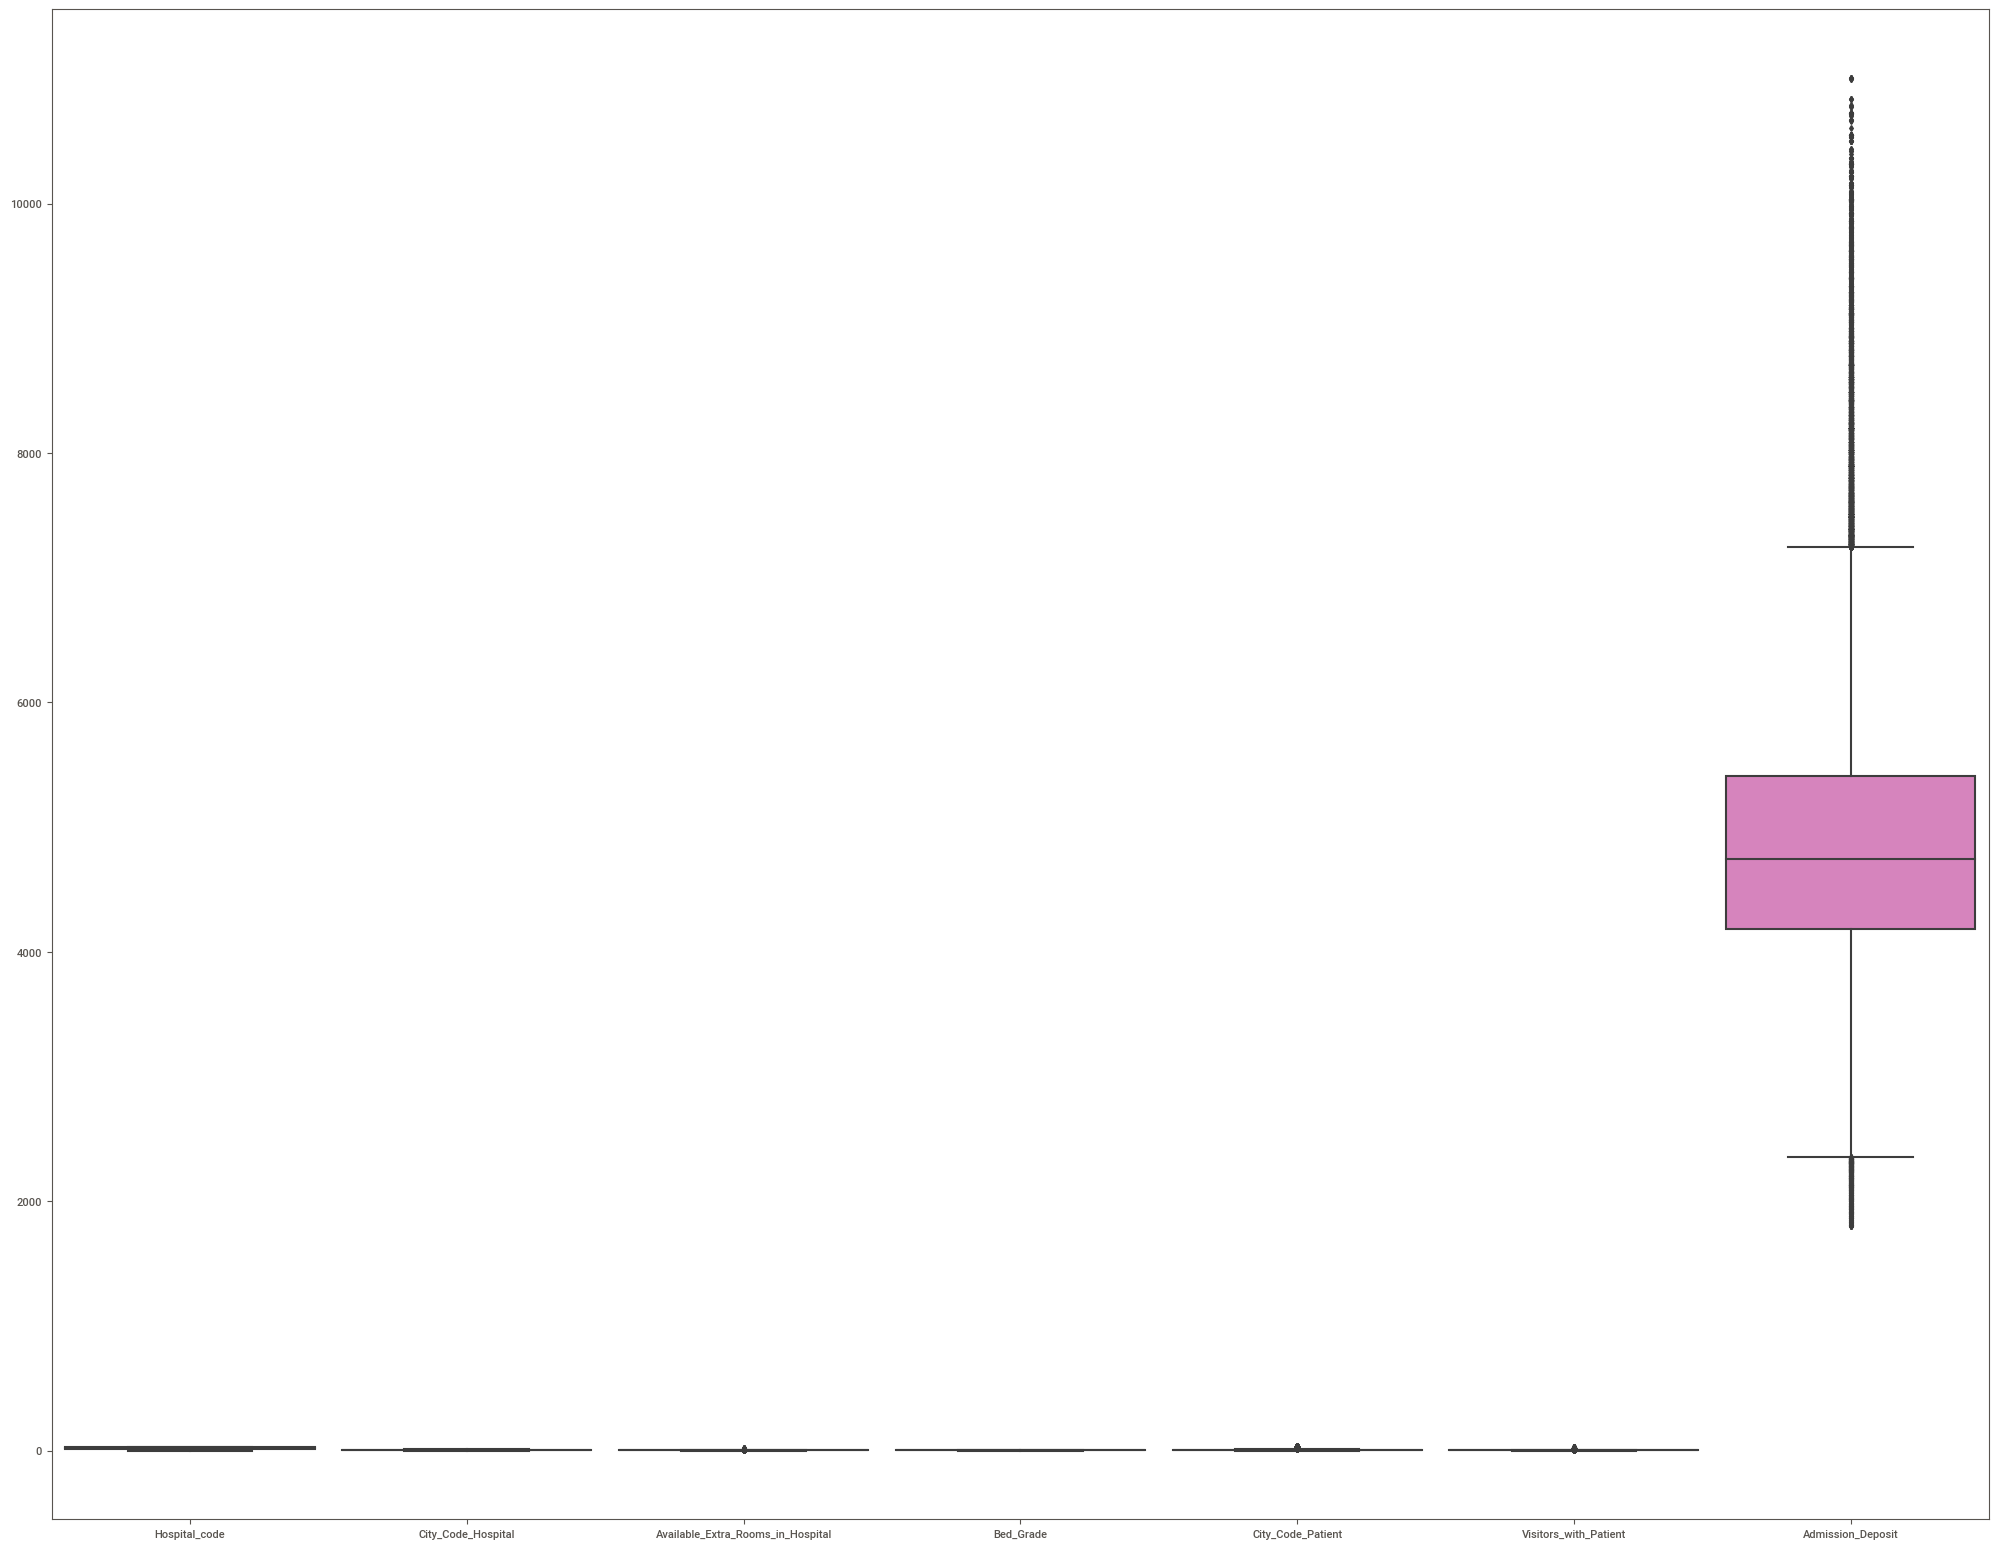

In [77]:
## Lets check outliers in any
## chekcing the outliers
fig, ax = plt.subplots(figsize=(25,20))
sns.boxplot(data=data1, width= 0.9,ax=ax,  fliersize=3)
plt.show()

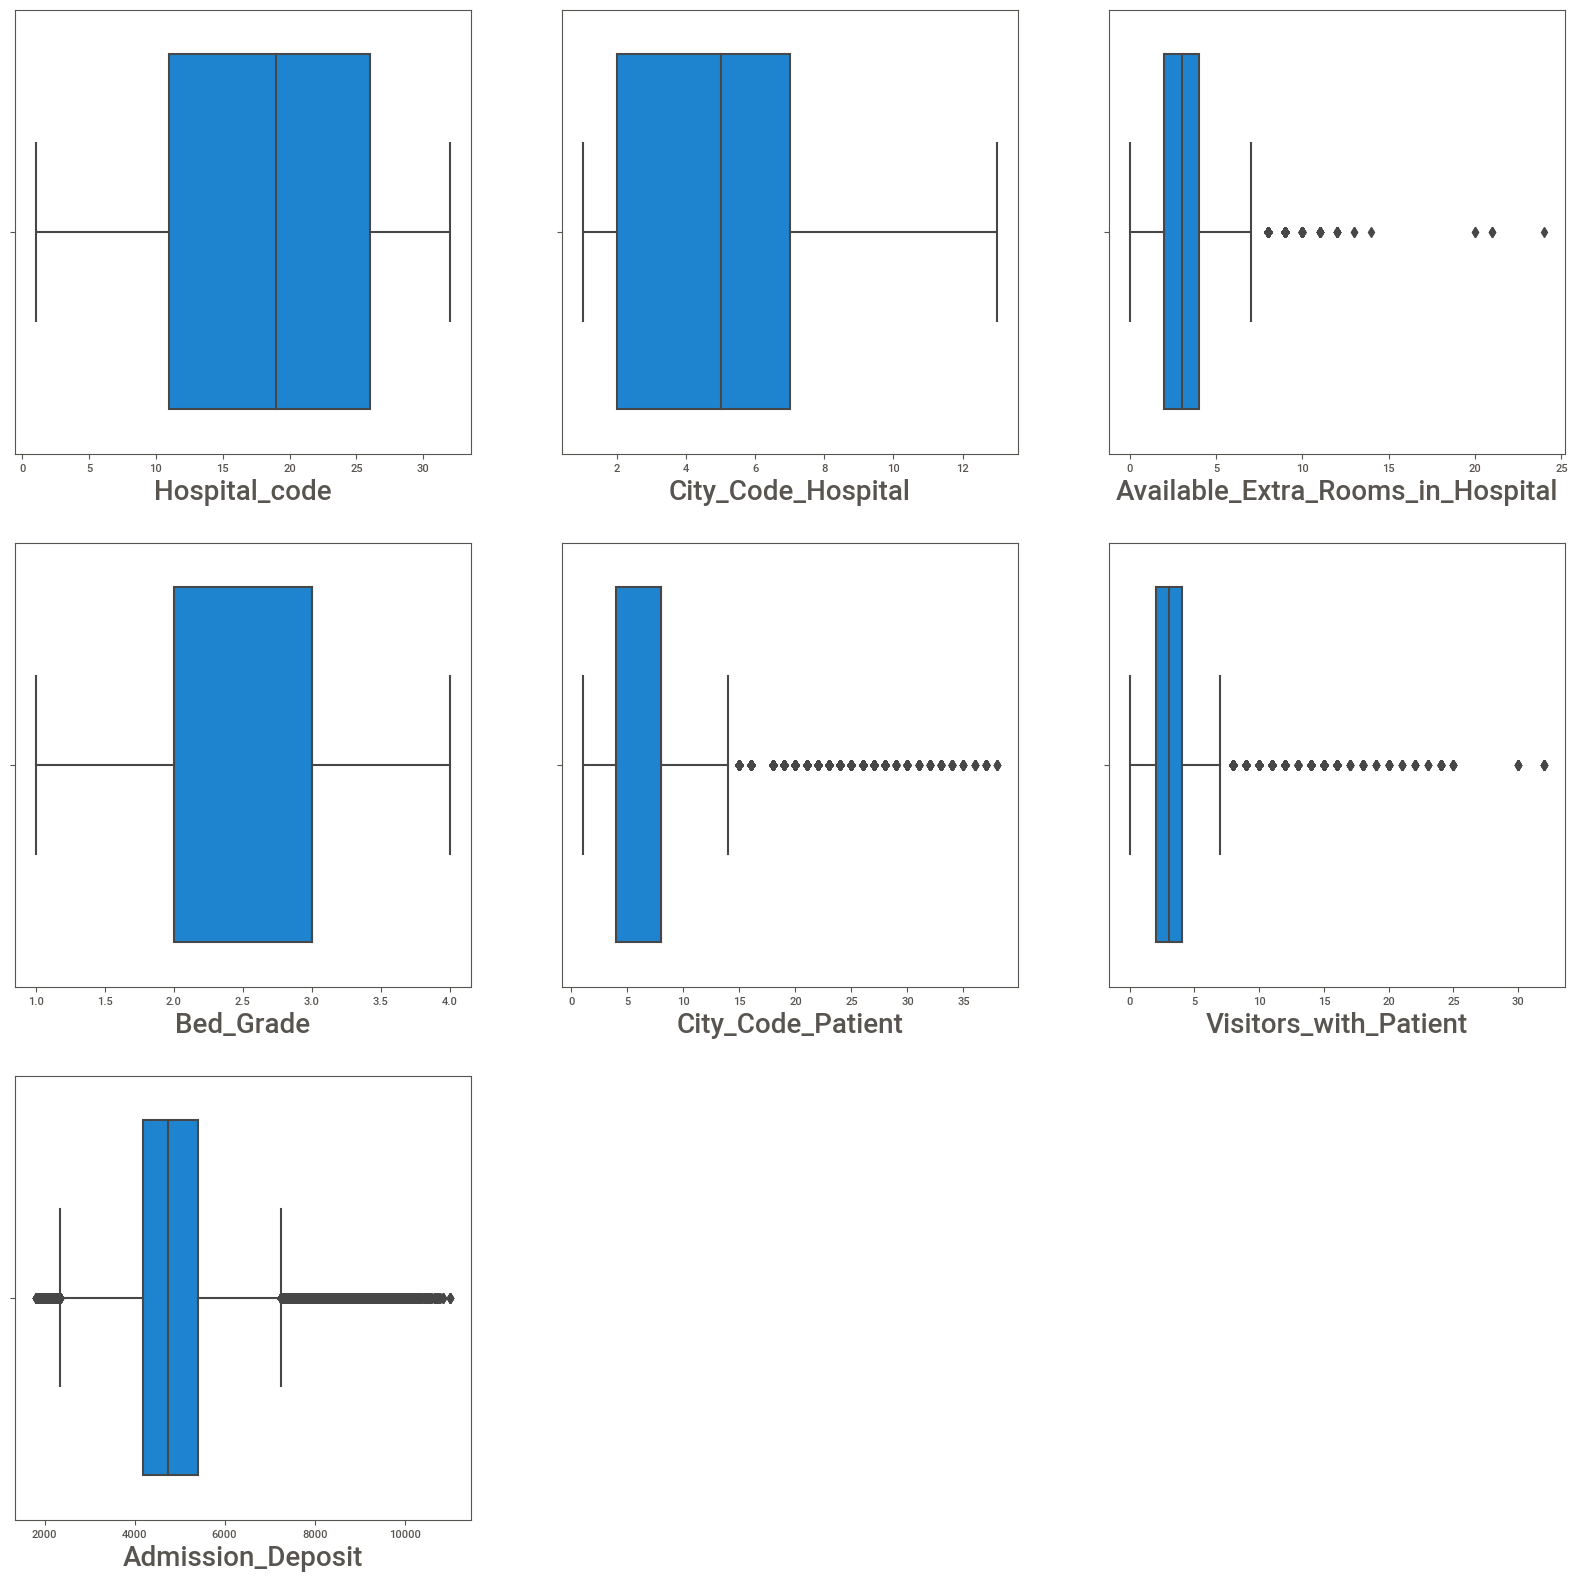

In [78]:
box=data1
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in box:
    if plotnumber<=10 :  
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(x=box[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [79]:
 ##Handling the outliers
data.Available_Extra_Rooms_in_Hospital.value_counts()
    # Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(data.Available_Extra_Rooms_in_Hospital, interpolation = 'midpoint') 

IQR
    ## min and max limit calculation
    # First quartile (Q1) 
Q1 = data.Available_Extra_Rooms_in_Hospital.quantile(0.25)
    # Third quartile (Q3) 
Q3 =data.Available_Extra_Rooms_in_Hospital.quantile(0.75)
    ##getting the limits
min_limit=Q1 - 1.5*IQR

 max_limit=Q3 +1.5*IQR

In [80]:
print('min: ' ,min_limit)
print('max: ' ,max_limit)

min:  -1.0
max:  7.0


In [81]:
data.loc[data['Available_Extra_Rooms_in_Hospital'] >=max_limit]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
69,70,31,3,3,2,7,0,0,5,2.0,83512,6.0,1,0,4,8,3611,1
110,111,9,4,5,2,8,0,1,0,2.0,110115,8.0,1,0,4,7,3035,1
121,122,23,0,6,0,7,0,1,0,3.0,25492,1.0,0,0,4,4,3295,1
178,179,8,3,3,2,7,0,1,0,4.0,117334,4.0,0,0,4,3,4244,1
187,188,19,0,7,1,7,0,1,3,2.0,2352,8.0,1,1,4,3,4101,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318235,318236,14,0,1,0,7,0,3,1,3.0,83868,7.0,2,1,6,5,5725,1
318247,318248,27,0,7,1,7,2,3,3,4.0,1777,9.0,1,1,4,2,6012,1
318249,318250,24,0,1,0,7,0,1,1,3.0,1811,12.0,0,1,4,1,4588,1
318278,318279,15,3,5,2,7,1,3,0,3.0,62868,26.0,2,0,6,3,7232,2


In [82]:
data.loc[data['Available_Extra_Rooms_in_Hospital'] <=min_limit]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay


In [83]:
data.loc[data['Available_Extra_Rooms_in_Hospital'] > max_limit,'Available_Extra_Rooms_in_Hospital']=np.median(data.Available_Extra_Rooms_in_Hospital)
#data.loc[data['stroke'] <= min_limit,'stroke']=np.median(data.stroke)

C:\Users\Emmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


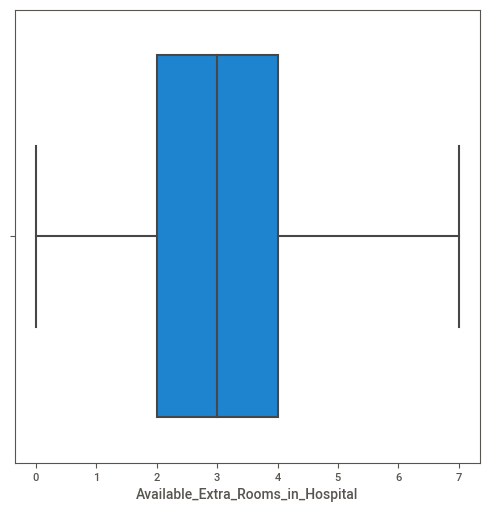

In [84]:
sns.boxplot(data.Available_Extra_Rooms_in_Hospital)
plt.show()

## Feature Selection

In [85]:
data.Age

0         5
1         5
2         5
3         5
4         5
         ..
318433    4
318434    8
318435    7
318436    1
318437    1
Name: Age, Length: 318438, dtype: int64

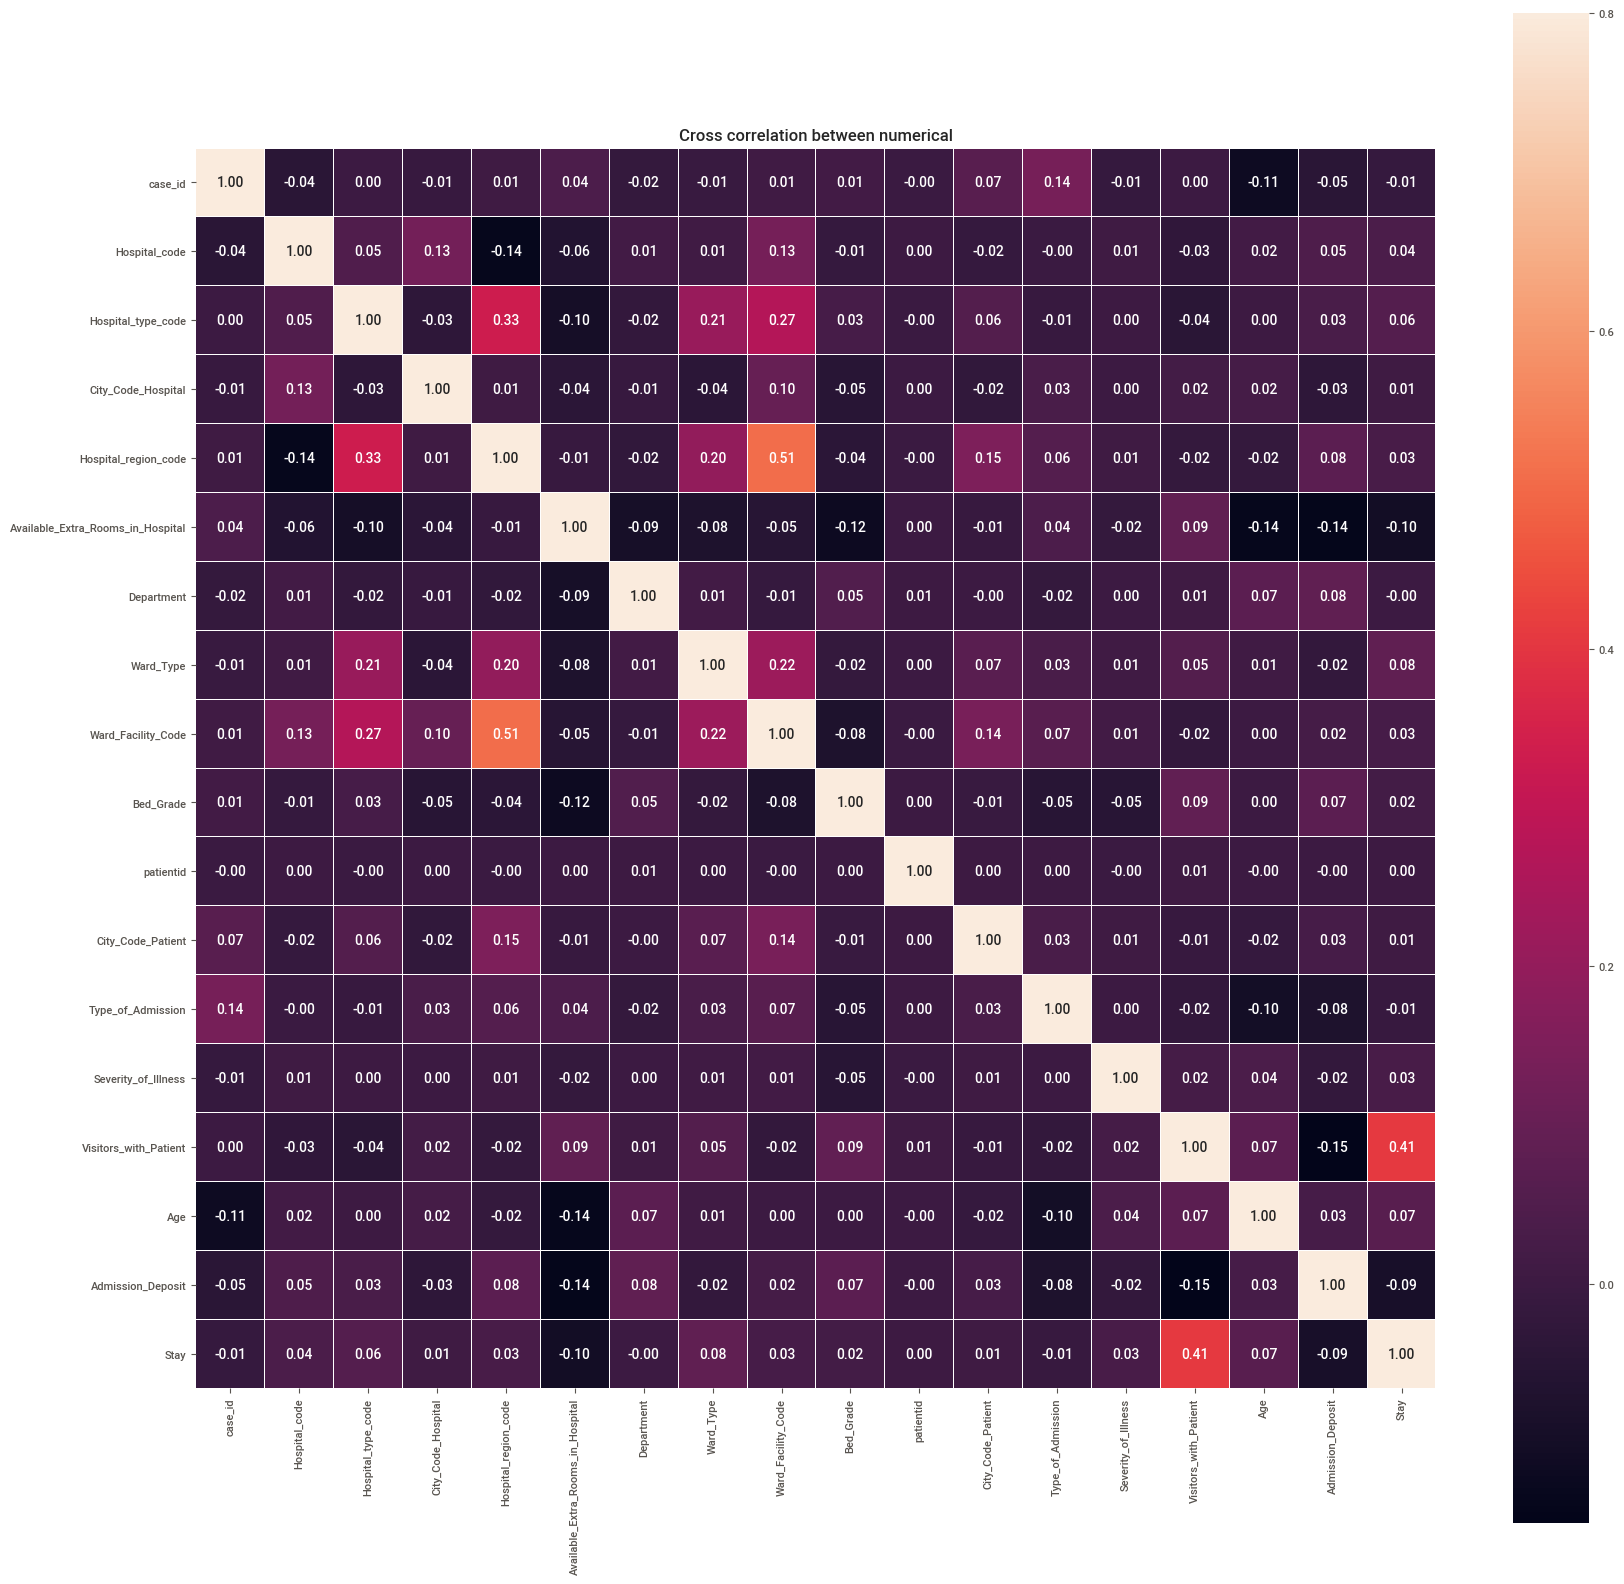

In [86]:
plt.figure(figsize=(20, 20))
ax = sns.heatmap(data.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Cross correlation between numerical')
plt.show()


In [87]:
data2 = data.drop(['case_id'],axis=1)
data2.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,8,3,3,2,3.0,2,0,0,2.0,31397,7.0,1,2,2,5,4911,2
1,2,3,5,2,2.0,2,2,0,2.0,31397,7.0,0,2,2,5,5954,2
2,10,5,1,0,2.0,1,2,1,2.0,31397,7.0,0,2,2,5,4745,1
3,26,2,2,1,2.0,2,0,2,2.0,31397,7.0,0,2,2,5,7272,2
4,26,2,2,1,2.0,2,2,2,2.0,31397,7.0,0,2,2,5,5558,2


In [88]:
data.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available_Extra_Rooms_in_Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed_Grade',
       'patientid', 'City_Code_Patient', 'Type_of_Admission',
       'Severity_of_Illness', 'Visitors_with_Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [89]:
## checking the duplicate rows
data2.duplicated().sum()

67

In [90]:
## droping the duplicate rows
data2.drop_duplicates(inplace=True)

In [91]:
## checking the constant features
data2.describe()
## the standard deviation of all features are not 0 ,so the there are constant features in the dataset.

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
count,318371.000000,318371.000000,318371.000000,318371.000000,318371.000000,318371.000000,318371.000000,318371.000000,318371.000000,318371.000000,318371.000000,318371.000000,318371.000000,318371.000000,318371.000000,318371.000000,318371.000000
mean,18.319300,1.806546,4.771528,0.778092,3.174834,0.377547,0.888215,1.713093,2.625544,65746.243483,7.262618,0.674157,0.625921,3.283641,4.127587,4880.716918,1.409466
std,8.633619,1.933420,3.102639,0.752513,1.115179,0.799929,0.859737,1.687989,0.873032,37980.316599,4.712427,0.724075,0.768365,1.763083,1.889490,1086.734720,0.694427
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1800.000000,1.000000
25%,11.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,32846.000000,4.000000,0.000000,0.000000,2.000000,3.000000,4186.000000,1.000000
50%,19.000000,2.000000,5.000000,1.000000,3.000000,0.000000,1.000000,1.000000,3.000000,65723.000000,8.000000,1.000000,0.000000,3.000000,4.000000,4741.000000,1.000000
75%,26.000000,3.000000,7.000000,1.000000,4.000000,0.000000,2.000000,3.000000,3.000000,98470.000000,8.000000,1.000000,1.000000,4.000000,5.000000,5409.000000,2.000000
max,32.000000,7.000000,13.000000,2.000000,7.000000,4.000000,5.000000,5.000000,4.000000,131624.000000,38.000000,2.000000,2.000000,32.000000,9.000000,11008.000000,4.000000


## Model Creation

In [92]:
## Defining X and y and creating dependent and independent variables
X = data2.drop(columns = ['Stay']) ## independent variable
y = data2['Stay'] ## Dependent or target variable"

In [93]:
X

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit
0,8,3,3,2,3.0,2,0,0,2.0,31397,7.0,1,2,2,5,4911
1,2,3,5,2,2.0,2,2,0,2.0,31397,7.0,0,2,2,5,5954
2,10,5,1,0,2.0,1,2,1,2.0,31397,7.0,0,2,2,5,4745
3,26,2,2,1,2.0,2,0,2,2.0,31397,7.0,0,2,2,5,7272
4,26,2,2,1,2.0,2,2,2,2.0,31397,7.0,0,2,2,5,5558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,0,6,0,3.0,2,1,0,4.0,86499,23.0,1,0,3,4,4144
318434,24,0,1,0,2.0,1,1,1,4.0,325,8.0,2,0,4,8,6699
318435,7,0,4,0,3.0,0,0,0,4.0,125235,10.0,1,1,3,7,4235
318436,11,2,2,1,3.0,1,1,2,3.0,91081,8.0,0,1,5,1,3761


In [94]:
y

0         2
1         2
2         1
3         2
4         2
         ..
318433    1
318434    1
318435    1
318436    1
318437    2
Name: Stay, Length: 318371, dtype: int64

In [95]:
## Balacing the data
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print(Counter(y))
X_sm,y_sm=sm.fit_resample(X,y)
print(Counter(y_sm))

Counter({1: 220773, 2: 70342, 3: 21748, 4: 5508})
Counter({2: 220773, 1: 220773, 3: 220773, 4: 220773})


In [96]:
## scaling the data as all features seems to be near to normal distribution
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()## objet creation
X_scaled = scalar.fit_transform(X_sm)

In [97]:
X_scaled

array([[-1.35370987,  0.76805409, -0.529516  , ..., -0.86741292,
         0.5551985 ,  0.11336364],
       [-2.12739854,  0.76805409,  0.19192719, ..., -0.86741292,
         0.5551985 ,  0.996633  ],
       [-1.09581364,  1.96414172, -1.25095919, ..., -0.86741292,
         0.5551985 , -0.02721423],
       ...,
       [-0.19317686, -1.02607736, -0.529516  , ..., -0.86741292,
        -0.63483628,  0.13199444],
       [-0.96686553,  0.17001028, -0.89023759, ...,  0.88151079,
         0.5551985 ,  2.68272054],
       [ 0.32261559, -1.02607736,  0.91337039, ..., -0.43018199,
        -0.03981889,  0.12098533]])

In [98]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y_sm, test_size= 0.25,random_state = 355)

In [99]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(662319, 16)
(220773, 16)
(662319,)
(220773,)


## Logistic Regression Model

In [100]:
##Model1 creation
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(multi_class='ovr')## object Creation

model1.fit(x_train,y_train)## fitting the model with training data

LogisticRegression(multi_class='ovr')

Let's see how well our model performs on the test data set.

In [101]:
y_pred1= model1.predict(x_test)

In [102]:
pd.crosstab(y_test,y_pred1)

col_0,1,2,3,4
Stay,,,,
1,34512,8496,3944,8122
2,20158,12883,9109,13029
3,5578,4685,34755,10550
4,11283,8196,15382,20091


In [103]:
## calculating accuracy
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_test,y_pred1)
accuracy

0.46310463688947473

In [104]:
# Precison
Precision = precision_score(y_test,y_pred1,average='weighted')
Precision

0.44933415343525296

In [105]:
# Recall
Recall = recall_score(y_test,y_pred1,average='weighted')
Recall

0.46310463688947473

In [106]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           1       0.48      0.63      0.55     55074
           2       0.38      0.23      0.29     55179
           3       0.55      0.63      0.59     55568
           4       0.39      0.37      0.38     54952

    accuracy                           0.46    220773
   macro avg       0.45      0.46      0.45    220773
weighted avg       0.45      0.46      0.45    220773



### Decision Tree Model

In [107]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred2=dt.predict(x_test)

In [108]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score
## Training score
y_train_predict=dt.predict(x_train)
cc_train=accuracy_score(y_train,y_train_predict)
cc_train

1.0

In [109]:
pd.crosstab(y_train,y_train_predict)

col_0,1,2,3,4
Stay,,,,
1,165699,0,0,0
2,0,165594,0,0
3,0,0,165205,0
4,0,0,0,165821


In [110]:
test_acc=accuracy_score(y_test,y_pred2)
test_acc

0.7192953848523144

In [111]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           1       0.76      0.73      0.74     55074
           2       0.56      0.53      0.55     55179
           3       0.75      0.75      0.75     55568
           4       0.80      0.87      0.83     54952

    accuracy                           0.72    220773
   macro avg       0.72      0.72      0.72    220773
weighted avg       0.72      0.72      0.72    220773



In [112]:
f_Score=f1_score(y_test,y_pred2,average='weighted')
f_Score

0.7170254160189303

### Random Forest Model

In [113]:

from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(n_estimators=100)
model3.fit(x_train,y_train)

RandomForestClassifier()

In [114]:
y_pred3=model3.predict(x_test)
y_pred3

array([4, 3, 4, ..., 4, 4, 1], dtype=int64)

In [115]:
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           1       0.77      0.93      0.84     55074
           2       0.78      0.59      0.68     55179
           3       0.83      0.87      0.85     55568
           4       0.94      0.94      0.94     54952

    accuracy                           0.83    220773
   macro avg       0.83      0.83      0.83    220773
weighted avg       0.83      0.83      0.83    220773



In [116]:
f_Score=f1_score(y_test,y_pred3,average='weighted')
f_Score

0.8257127572149847

### XGBoost

In [118]:
import xgboost

In [119]:
## model creation
from xgboost import XGBClassifier
xgb_c=XGBClassifier()
xgb_c.fit(x_train,y_train)
y_pred4=xgb_c.predict(x_test)

C:\Users\Emmal\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:42:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [120]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           1       0.75      0.96      0.84     55074
           2       0.59      0.40      0.48     55179
           3       0.64      0.70      0.67     55568
           4       0.63      0.61      0.62     54952

    accuracy                           0.67    220773
   macro avg       0.66      0.67      0.65    220773
weighted avg       0.66      0.67      0.65    220773



In [122]:
f_Score=f1_score(y_test,y_pred4,average='weighted')
f_Score

0.6533687884031969

#### Project Highligths:

Hospital admission data was analyzed to accurately predict the patient’s Length of Stay at the time of admit so that the hospitals can optimize resources and function better. Built 5 models in Python to predict the length of stay,

A supervised algorithm Logistic Regression which was classifying with an accuracy of 46%.

An ensemble method XGBoost which was predicting with an accuracy of 65%.

A Decision Tree Model which yields an accuracy of 72%.

A Random Forest Model which yields an accuracy of 83%.

### Future Insights:

1. Smart Staffing & Personnel Management - having a large voume of quality data helps health care professionals in allocating resources efficiently. Healthcare professionals can analyze the outcomes of checkups among individuals in various demographic groups and determine what factors prevent individuals from seeking tratement.

2. Advanced Risk & Disease Management - Healthcare institutions can offer accurate, preventive care. Effectively decreasing hospital admissions by digging into insights such as drug type, conditions and the duration of patient visits, amonong many others.

3. Real-time Alerting - Clinincal Decision Support apllications in hospital analyzes patient evidence on the spot, delivering recommendations to health professionals when they make prescriptive choces. However, to prevent unnecessary in-house procedure, physicians prefer people to stay away from hospitals.

4. Enhancing Patient Engagement - Every step they take, heart rates, sleeping habits, can be tracked for potential patients (who use smart wearables). All this information can be correlated with other trackable data to identify potential health risks.

## Conclusion:
In this project, different variables were analyzed that correlate eith Length of Stay by using patient-level and hospital-level date.
    
By predicting a patient's length of stay at the time of admission helps hospital to allocate resources more efficiently and manage their patients more effectively. Identifying factors that associate with length of Stay (LOS) to predict and manage the number of days patients stay, could help hospitals in managing resources and in the developement of new treatement plans. Effective use of hospital resources and reducing the length of stay can reduce overall national medical expenses.